In [16]:
import pandas as pd
import os

df = pd.read_csv(os.path.join("..","Data-PR-As2","Genes","data.csv"))
print(df.describe())

           gene_0      gene_1      gene_2      gene_3      gene_4  gene_5  \
count  801.000000  801.000000  801.000000  801.000000  801.000000   801.0   
mean     0.026642    3.010909    3.095350    6.722305    9.813612     0.0   
std      0.136850    1.200828    1.065601    0.638819    0.506537     0.0   
min      0.000000    0.000000    0.000000    5.009284    8.435999     0.0   
25%      0.000000    2.299039    2.390365    6.303346    9.464466     0.0   
50%      0.000000    3.143687    3.127006    6.655893    9.791599     0.0   
75%      0.000000    3.883484    3.802534    7.038447   10.142324     0.0   
max      1.482332    6.237034    6.063484   10.129528   11.355621     0.0   

           gene_6      gene_7      gene_8      gene_9  ...  gene_20521  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     7.405509    0.499882    0.016744    0.013428  ...    5.896573   
std      1.108237    0.508799    0.133635    0.204722  ...    0.746399   
min      3

In [48]:
df_labels = pd.read_csv(os.path.join("..","Data-PR-As2","Genes","labels.csv"))

In [17]:
df = df.iloc[:, 1:]

In [50]:
df_labels = df_labels.iloc[:, 1:]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df_labels, test_size=0.2)
rm_cols = [col for col in X_train.columns if X_train[col].mean() == 0]
X_train = X_train.drop(columns=rm_cols)
print(X_train.describe())
print(y_train.describe())

           gene_0      gene_1      gene_2      gene_3      gene_4      gene_6  \
count  640.000000  640.000000  640.000000  640.000000  640.000000  640.000000   
mean     0.026928    2.991862    3.097440    6.727296    9.817021    7.425356   
std      0.139273    1.225730    1.072949    0.627209    0.498582    1.118512   
min      0.000000    0.000000    0.000000    5.009284    8.435999    3.930747   
25%      0.000000    2.249392    2.394349    6.303883    9.476331    6.683780   
50%      0.000000    3.108357    3.147124    6.661016    9.797328    7.436657   
75%      0.000000    3.870676    3.803307    7.041829   10.130483    8.181737   
max      1.482332    6.051542    6.063484   10.129528   11.355621   10.718190   

           gene_7      gene_8      gene_9     gene_10  ...  gene_20521  \
count  640.000000  640.000000  640.000000  640.000000  ...  640.000000   
mean     0.514786    0.018817    0.010451    0.683495  ...    5.896237   
std      0.516025    0.143501    0.163386    1.1

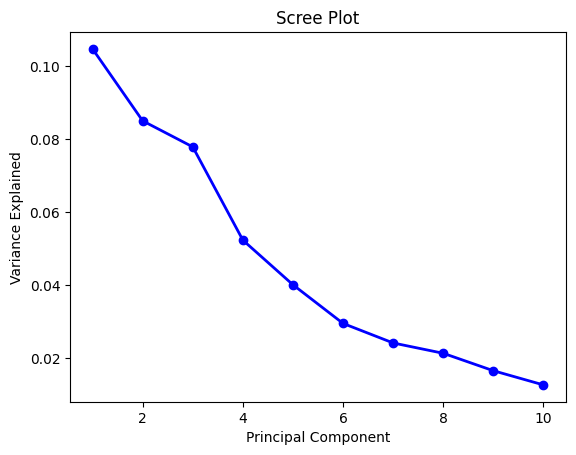

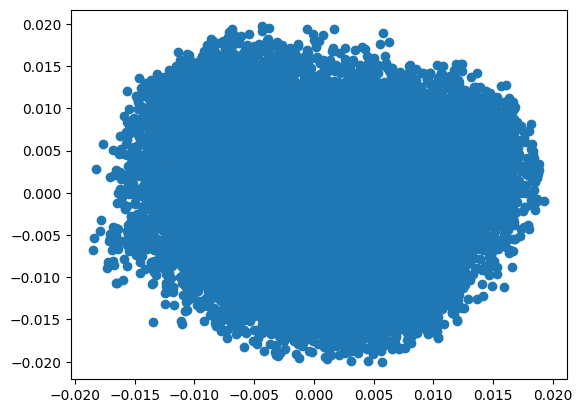

20263


In [56]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

normalizer = StandardScaler()

train_normalized = normalizer.fit_transform(X_train)
pca = PCA(n_components=10)
pca.fit(train_normalized)

PC_values = np.arange(pca.n_components_) + 1
#print(pca.explained_variance_ratio_[9])
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
plt.cla()
plt.scatter(pca.components_[0], pca.components_[1])
plt.show()
print(len(pca.components_[0]))